In [1]:
from ultralytics import YOLO
import cv2
import cvzone
import math
import matplotlib.pyplot as plt

In [28]:
model = YOLO("yolov8l.pt")

((336, 594, 3), <matplotlib.image.AxesImage at 0x1c57d6c5450>)

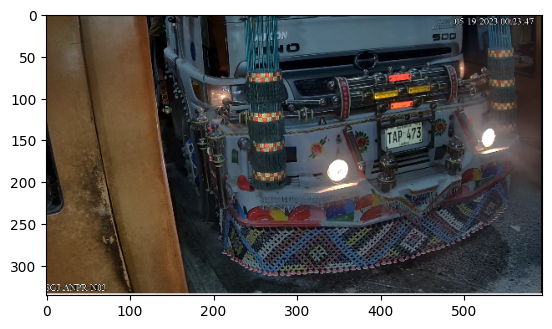

In [29]:
image = cv2.imread('data//test_image_2.png')

image.shape, plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 

In [30]:
res = model.predict(image) # we have to train car types of toll plaza
type(res)


0: 384x640 1 truck, 1075.2ms
Speed: 6.1ms preprocess, 1075.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


list

In [31]:
res[0].names # what yolo outputs

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [32]:
res[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7.])
conf: tensor([0.4486])
data: tensor([[1.3168e+02, 8.9411e-01, 5.6207e+02, 3.1290e+02, 4.4861e-01, 7.0000e+00]])
id: None
is_track: False
orig_shape: (336, 594)
shape: torch.Size([1, 6])
xywh: tensor([[346.8759, 156.8992, 430.3856, 312.0101]])
xywhn: tensor([[0.5840, 0.4670, 0.7246, 0.9286]])
xyxy: tensor([[131.6832,   0.8941, 562.0687, 312.9042]])
xyxyn: tensor([[0.2217, 0.0027, 0.9462, 0.9313]])

In [33]:
index = 0

class_id = res[0].boxes[index].cls[0].item()
coords = res[0].boxes[index].xyxy[0].tolist()
conf = res[0].boxes[index].conf[0].item()
class_id, coords, conf

(7.0,
 [131.68316650390625,
  0.8941076993942261,
  562.0687255859375,
  312.9042053222656],
 0.4486093819141388)

In [34]:
coords = res[0].boxes[0].xyxy[0].tolist()
coords
type(coords[0])

float

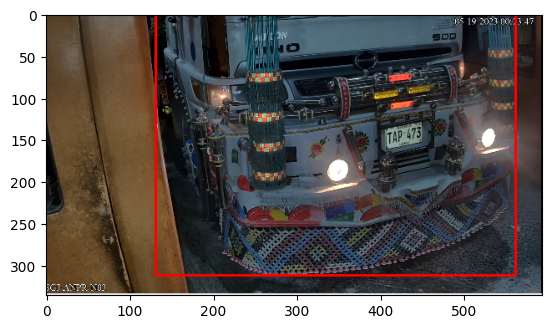

In [35]:
# takes staring point as top left and ending point as bottom left
image_marked = cv2.rectangle(image, (int(coords[0]), int(coords[1])), (int(coords[2]), int(coords[3])), (0, 0, 255), thickness=2)
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB)) 

In [ ]:
cap = cv2.VideoCapture('data\test_vid_1.mp4')
cap.isOpened()

True

In [ ]:
while cap.isOpened():
  ret, frame = cap.read()

  if not ret:
    print('Failed reading video!!!')
    break
  # loop will be broken when 'q' is pressed on the keyboard
  if cv2.waitKey(10) & 0xFF == ord('q'):
      break

  plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) 

cap.release()